__Data Analisis Penguins__


In [18]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss


__Graphic color__


In [19]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

__Charger data__

In [20]:
data_penguins = sns.load_dataset('penguins')
data_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [21]:
data_penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [22]:
#Observaciones de los datos.
data_penguins.shape
#334 columns or elements, 8 rows or variables

(344, 7)

In [23]:
#null_values
(data_penguins
.isna()
.sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

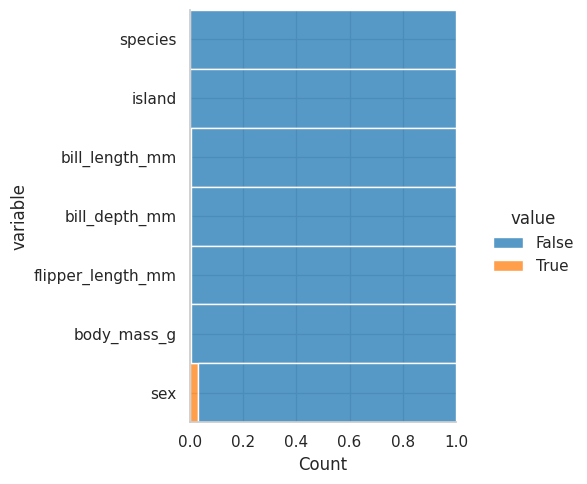

In [24]:
#proporcion de valor nulos por variable.
(
    data_penguins
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(data=df, y = 'variable', hue= 'value',multiple='fill')
        )
    )
)

Visualizar valores nulos en los conjuntos de datos.

<AxesSubplot: >

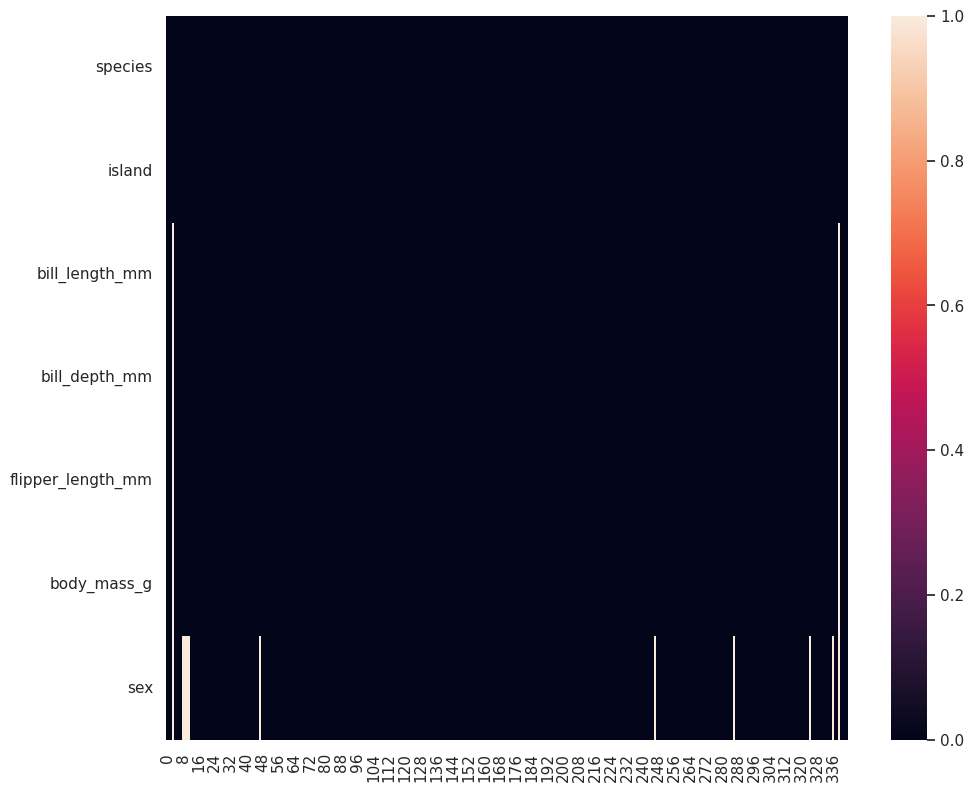

In [25]:
(
    data_penguins
    .isnull()
    .transpose()
    .pipe(
        lambda df :(
            sns.heatmap(df)
        )
    )
)

In [26]:
data_penguins_process= data_penguins.dropna()

__Describe data__

In [27]:
data_penguins_process.describe(include = 'all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


In [28]:
#Describe number data.T
data_penguins_process.describe(include = np.number)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [29]:
data_penguins_process.describe(include = object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


In [30]:
#Change of object to category 
(
    data_penguins_process
    .astype({
        'species' : 'category',
        'island': 'category',
        'sex':'category'
        }
    )
)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<AxesSubplot: >

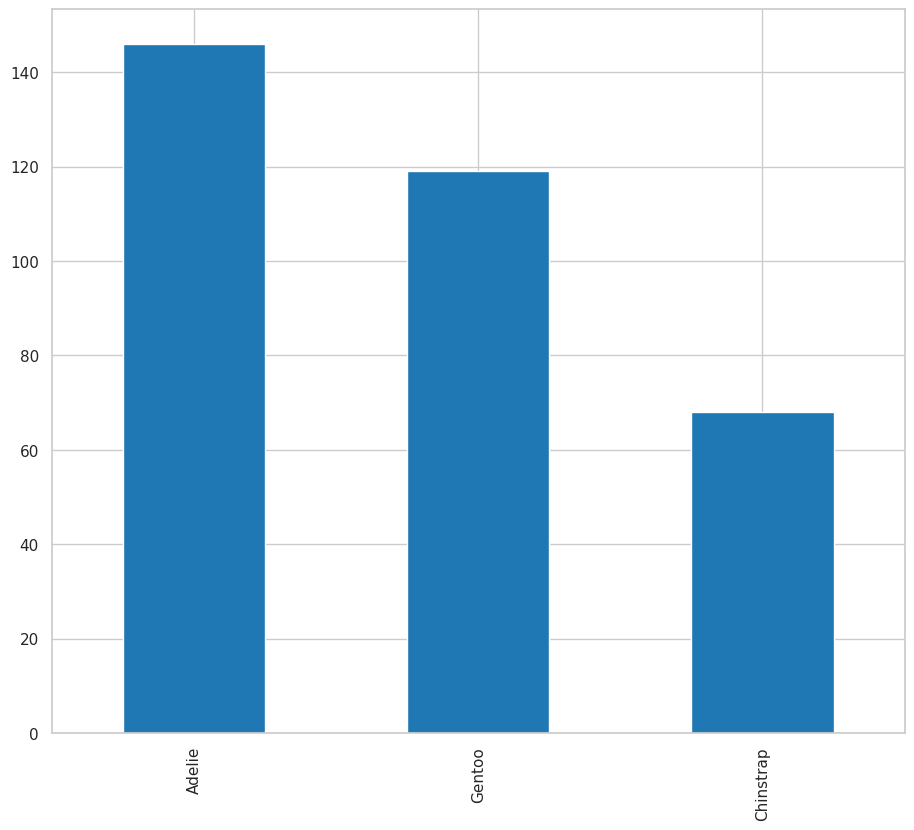

In [31]:
#basic visualitation using pandas.
(
    data_penguins_process
    .species
    .value_counts()
    .plot(
        kind='bar'
    )
)

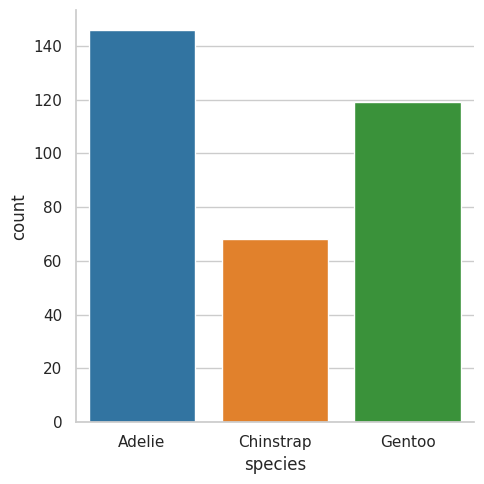

In [32]:
sns.catplot(
    data = data_penguins_process,
    x = 'species',
    kind='count'
)

<AxesSubplot: xlabel='species', ylabel='count'>

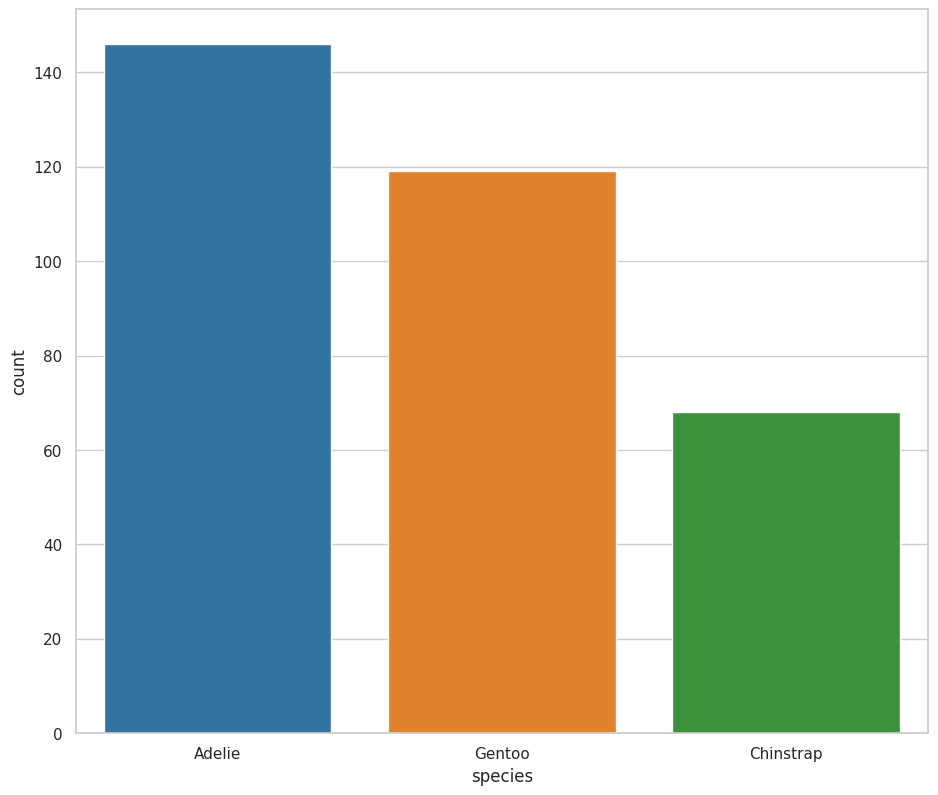

In [33]:
#Manul count, not use catplot.
(
    data_penguins_process
    .value_counts('species', sort=True)
    .reset_index(name = 'count')
    .pipe(
        lambda df:(
            sns.barplot(
                data= df,
                x = 'species',
                y ='count'
            )
        )
    )
)

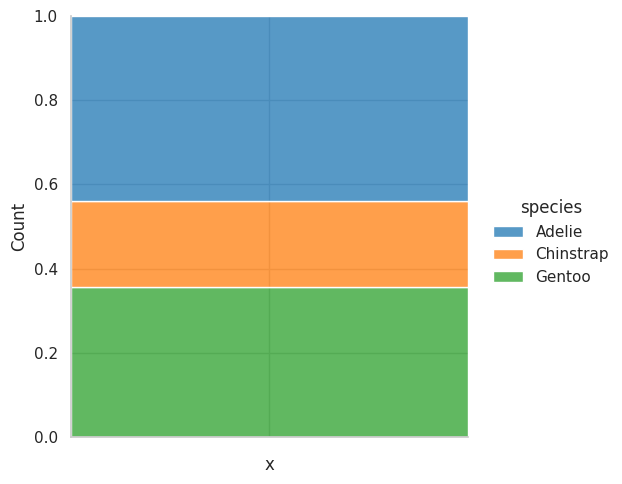

In [34]:
#Visualizar las proporciones.
(
    data_penguins_process
    .add_column('x', '')
    .pipe(
        lambda df:(
            sns.displot(
                data = df,
                x = 'x',
                hue = 'species',
                multiple = 'fill'
            )
        )
    )
)

In [35]:
data_penguins_process.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


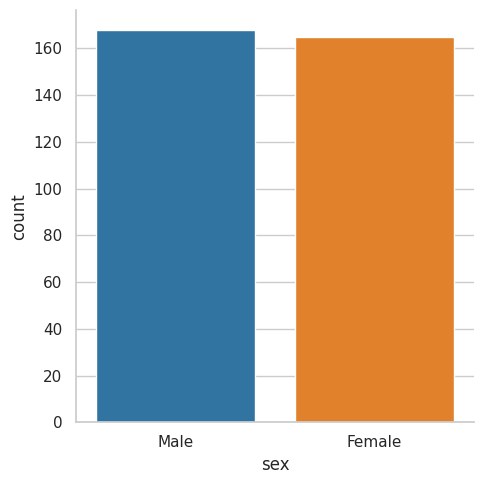

In [36]:
(
sns.catplot(data=data_penguins_process,x = 'sex', kind='count')
)

<AxesSubplot: xlabel='sex', ylabel='count'>

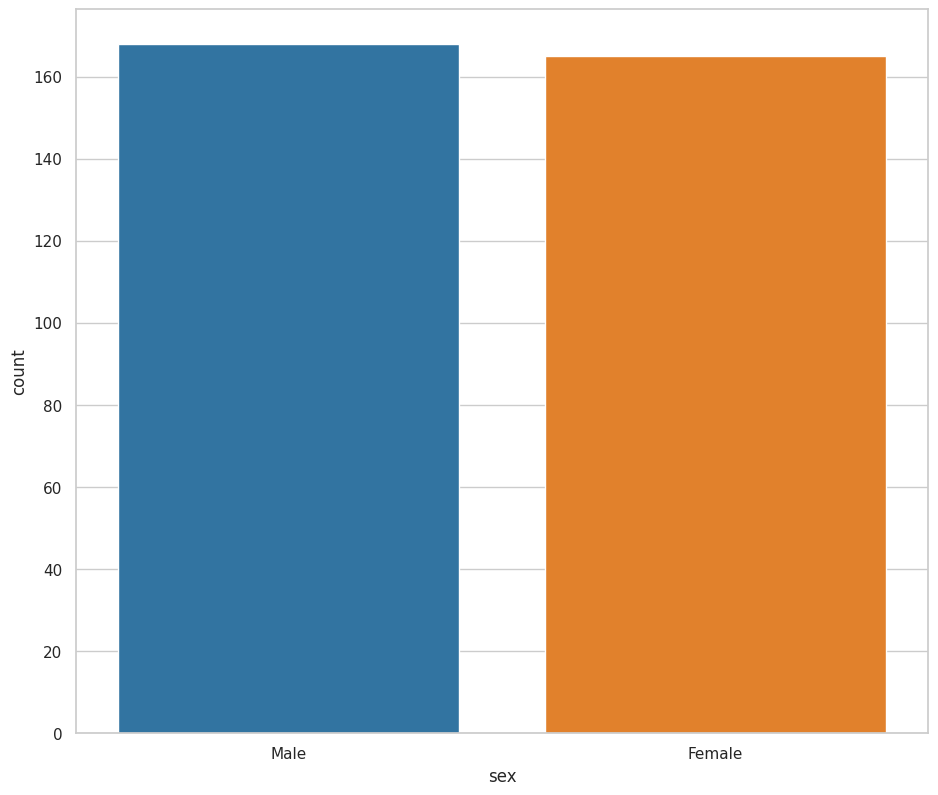

In [37]:
(
    data_penguins_process
    .value_counts('sex')
    .reset_index(name='count')
    .pipe(
        lambda df:(
            sns.barplot(
                data=df,
                x='sex',
                y='count'
                )
        ) 
    )
)

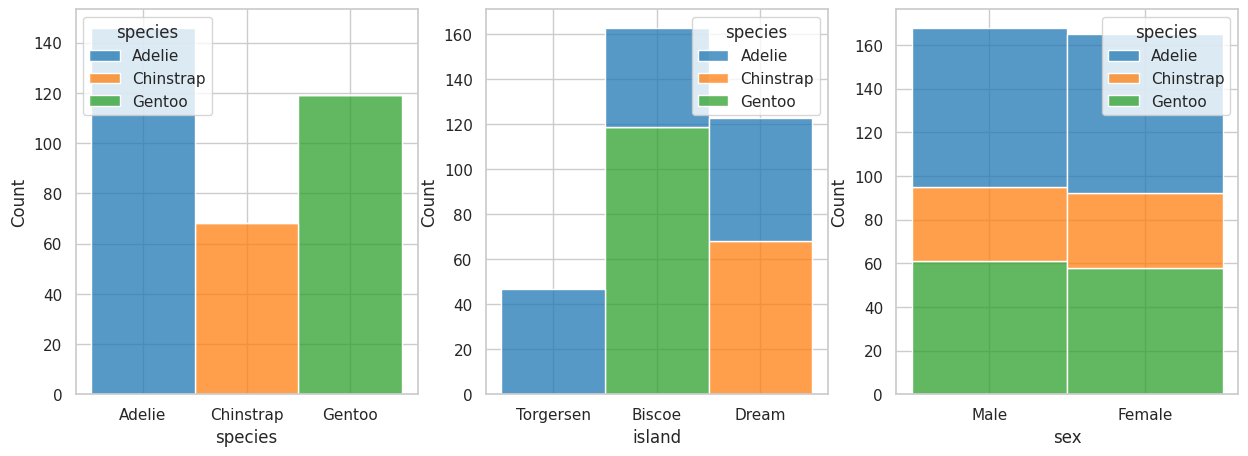

In [38]:
data_columns = data_penguins_process.select_dtypes('object').columns
fig, ax = plt.subplots(1,3,figsize=(15,5))

for i in range(len(data_columns)):
    sns.histplot(
        data =data_penguins_process,
        x = data_columns[i],
        ax=ax[i],
        hue='species',
        multiple= 'stack'
       
    );

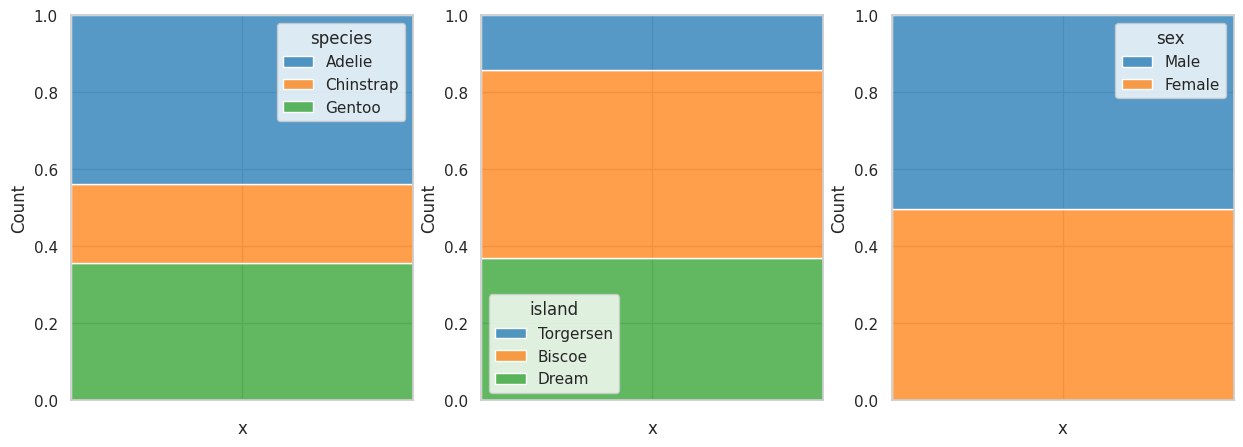

In [39]:
data_columns = data_penguins_process.select_dtypes('object').columns
fig, ax = plt.subplots(1,3,figsize=(15,5))
for i in range (len(data_columns)):
    sns.histplot(
        data = data_penguins_process.add_column('x',''),
        hue=data_columns[i],
        x = 'x',
        multiple='fill',
        ax = ax[i],
    )

![](vscode-remote://wsl%2Bubuntu-22.04/home/jann/Platzi/DataScience/analisis_exploratorio/2022-10-26_16h16_07.png)

__<h1>Estadistica Descriptiva Aplicada<h1>__

<h2>Media<h2>

In [40]:
#Meida o promedio.
data_penguins_process.bill_length_mm.mean()
#other form.
np.mean(data_penguins_process.bill_length_mm)


43.99279279279279

In [41]:
#mean all varaibles.
data_penguins_process.mean()

/tmp/ipykernel_508/4231596104.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_penguins_process.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

<h3> Mediana <h3>

In [42]:
data_penguins_process.median()

/tmp/ipykernel_508/1318566801.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_penguins_process.median()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64

<h2>Moda<h2>

In [43]:
data_penguins_process.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,Male


__describir los datos__

In [44]:
#Categoric varibles.
data_penguins_process.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


<h1>Estadistica descriptiva<h1>

Rango: Diferencia entre valor maximo y minimo.    


Rango intercuartilico: Comprende 25% de los datos respecto a la mediana.

Desviacion estandar: Ofrece la dispersion media de una varible.

![](../../../../../mnt/c/Users/juand/AppData/Local/Programs/Microsoft%20VS%20Code/c:/Users/juand/OneDrive/Fotos/Screenpresso/2022-10-26_17h19_17.png)

Resumen de la clase
Estadistica Descriptiva Aplicada: Medidas de Dispersion
Rango: La diferencia entre el valor maximo y minimo de los datos. Da una idea de que tan dispersos estan los datos
Rango Intercuartilico: Comprende el 25%, tanto arriba como abajo, de los datos respecto a la mediana. Divide el rango de los datos en 4 partes iguales y considera solo el 50% de los datos
Desviacion Estandar: Ofrece la dispersion media de una variable. Si a la media de una distribucion Normal se le suma, por arriba y por debajo, la desviacion estandar se obtiene un rango que contiene el 65% de los datos. Si se suma dos desviaciones estandar se obtiene el 95% de los datos. Si se suma tres desviaciones estandar se obtiene el 99% de los datos
graph20.jpg
Asimetría Estadística
Esta relacionado con la simetria de la distribucion

Si media = mediana = moda implica que la distribucion es simetrica.
Si media > mediana > moda, entonces La distribución esta sesgada hacia la izquierda. (Sesgo positivo)
Si media < mediana < moda, entonces la distribucion esta sesgada hacia la derecha. (Sesgo negativo)
graph21.jpg
Cutorsis
Es un estadístico de que tan juntos o que tan dispersos están los datos respecto a la media.

Si Cutorsis = 0, los datos estan distribuidos homogeneamente alrededor de la media (Distribucion Mesocurtica)
Si Cutorsis > 0, los datos estan concentrados alrededor de la media (Distribucion Leptocurtica)
Si Cutorsis < 0, los datos estan alejados de la media (Distribucion Platicurtica)
graph22.jpg

__Medidas de dispersion__

In [45]:
#max values.
data_penguins_process.max()

species                 Gentoo
island               Torgersen
bill_length_mm            59.6
bill_depth_mm             21.5
flipper_length_mm        231.0
body_mass_g             6300.0
sex                       Male
dtype: object

In [46]:
#min values
data_penguins_process.min()

species              Adelie
island               Biscoe
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
sex                  Female
dtype: object

In [47]:
#Range Values.
data_penguins_process.max(numeric_only=True)-data_penguins_process.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
dtype: float64

In [48]:
#calculate standard deviation.
data_penguins_process.std()

/tmp/ipykernel_508/4126974413.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_penguins_process.std()


bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
dtype: float64

<h2>Interquartile range<h2>

In [49]:
#data range in 0.75 -0.25
data_penguins_process.quantile(0.75) - data_penguins_process.quantile(0.25)

/tmp/ipykernel_508/113975603.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_penguins_process.quantile(0.75) - data_penguins_process.quantile(0.25)


bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
dtype: float64

In [50]:
(
    data_penguins_process
    .quantile(q= [0.75,0.50,0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr = lambda df : df[0.75]- df[0.25]
    )

)

/tmp/ipykernel_508/3314541272.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_penguins_process


,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0


__¿Como puedo visualizar la distribucion de una variable?__

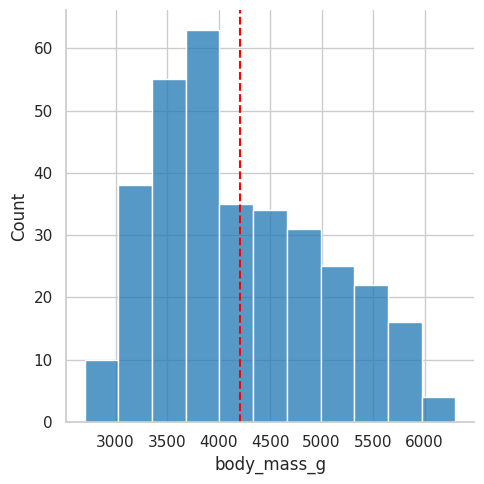

In [51]:

sns.displot(
    data = data_penguins_process,
    x = 'body_mass_g'
)
plt.axvline(
    x =data_penguins_process.body_mass_g.mean(),
    color = 'red',
    linestyle = 'dashed'
)

<AxesSubplot: xlabel='flipper_length_mm'>

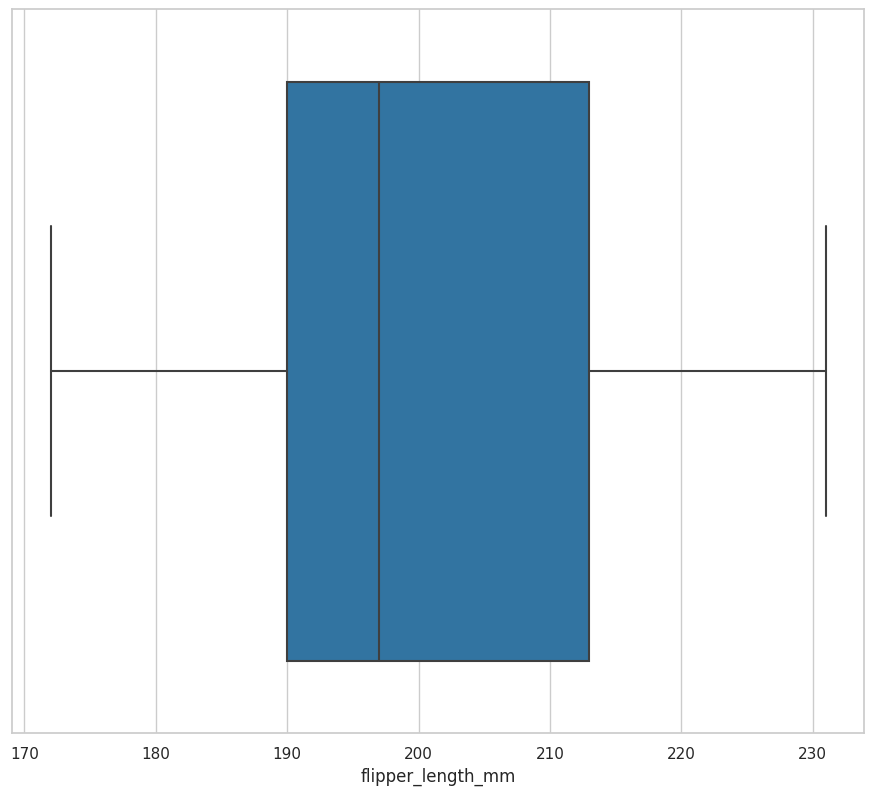

In [52]:
#Box plot.
sns.boxplot(
    data = data_penguins_process,
    x = 'flipper_length_mm'
)

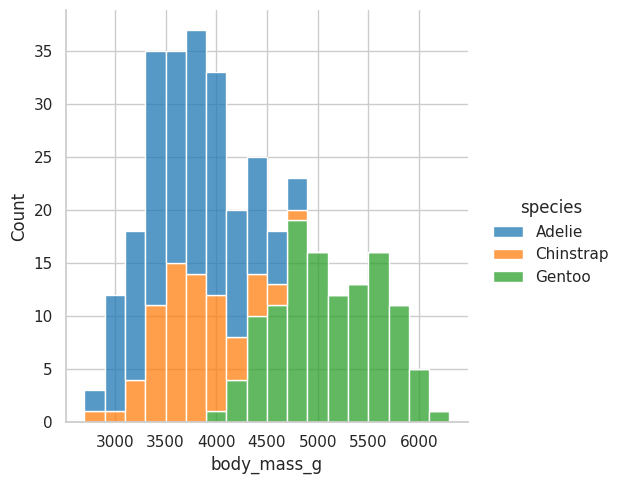

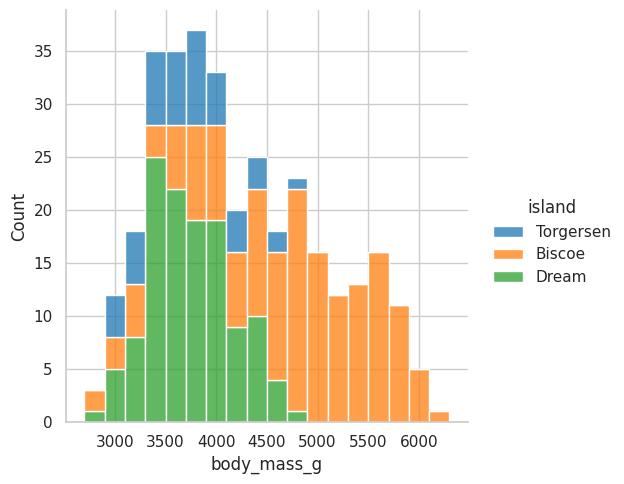

In [53]:
sns.displot(
    data = data_penguins_process,
    x= 'body_mass_g',
    binwidth =200,
    hue = 'species',
    multiple= 'stack'
    );
sns.displot(
    data = data_penguins_process,
    x= 'body_mass_g',
    binwidth= 200,
    hue = 'island', 
    multiple= 'stack'
);



<AxesSubplot: xlabel='island', ylabel='Count'>

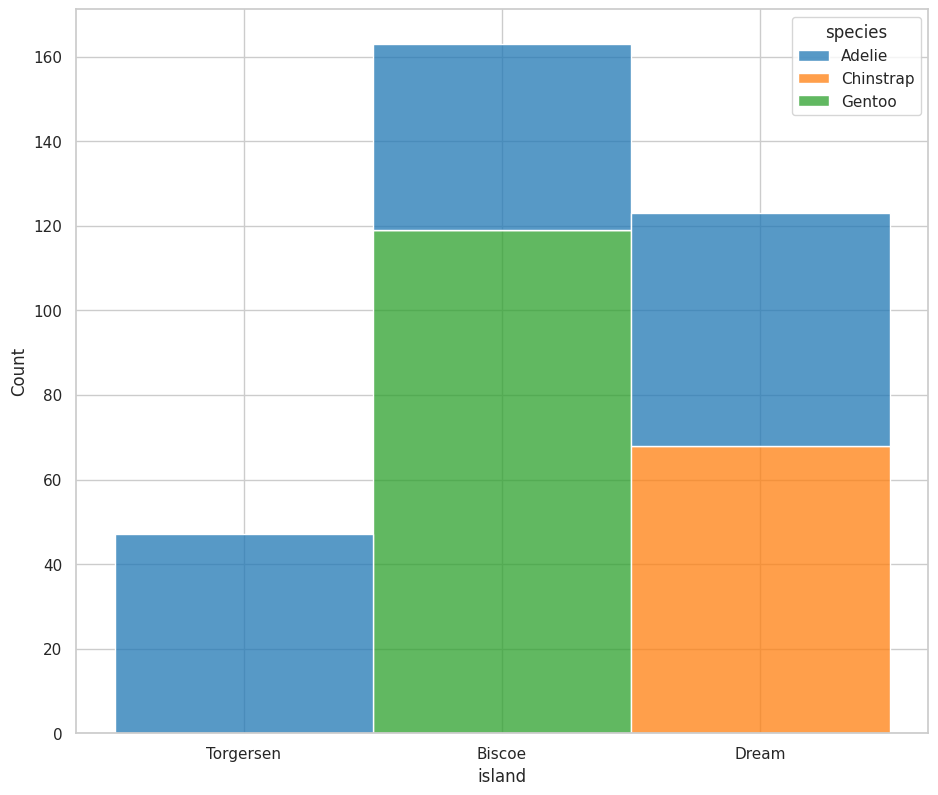

In [54]:
sns.histplot(
    data = data_penguins_process,
    x = 'island',
    hue= 'species',
    multiple= 'stack'
)

<AxesSubplot: xlabel='species', ylabel='Count'>

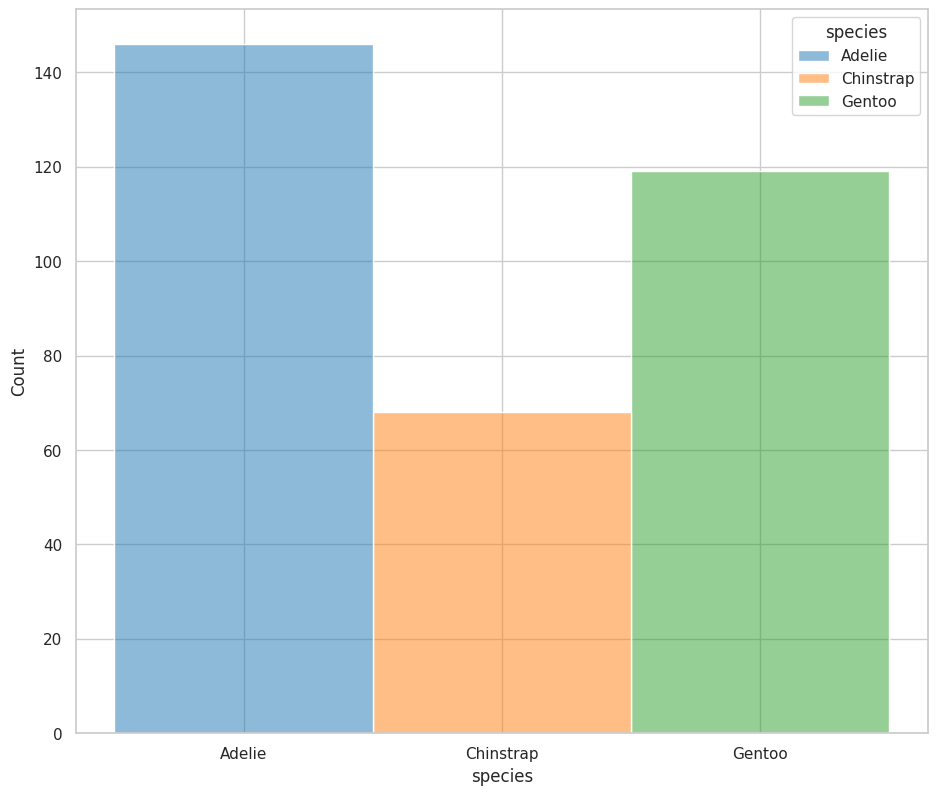

In [55]:
sns.histplot(
    data = data_penguins_process,
    x= 'species',
    hue = 'species'
)

__Descriptive statistics__

In [56]:
# How visualizate a dsitribution?

#Histogram

#Mass probability function.
#The probability that a discrete random variable takes on a given value. 

#Cumulative distribution function.
#a function whose value is the probability that a corresponding continuous random variable has a value less than or equal to the argument of the function.

#Probability density function
#a function of a continuous random variable, whose integral across an interval gives the probability that the value of the variable lies within the same interval.

<AxesSubplot: xlabel='body_mass_g', ylabel='Probability'>

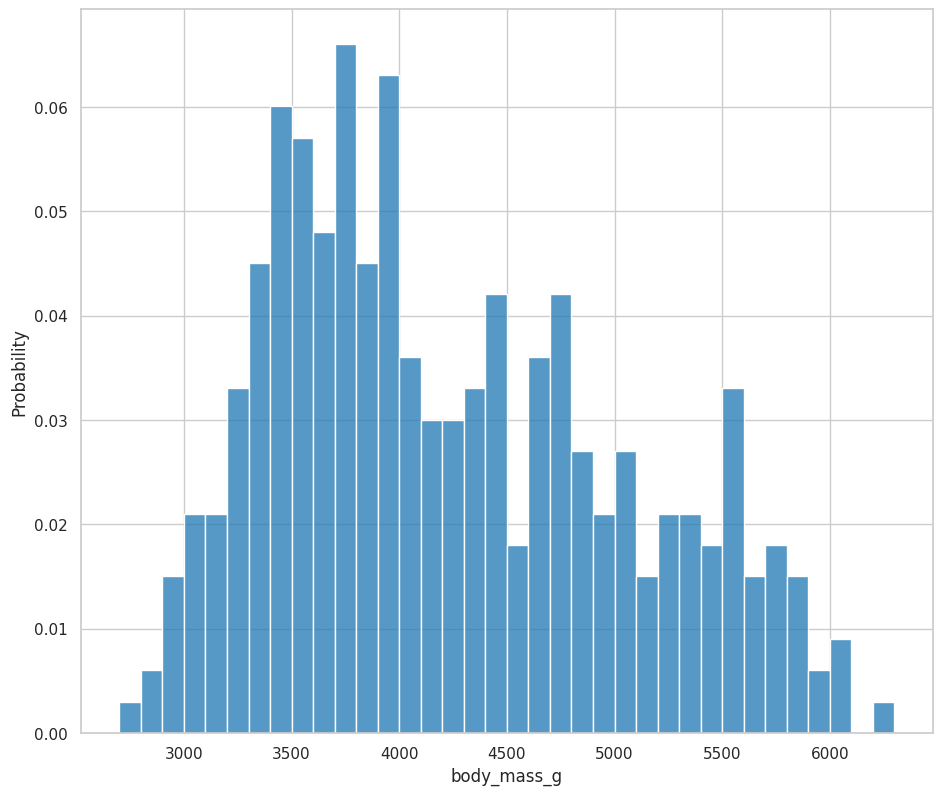

In [57]:
sns.histplot(
    data = data_penguins_process,
    x = 'body_mass_g',
    binwidth=100,
    stat= 'probability'  
)

__Using library empiricaldist__

In [58]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    data_penguins_process.flipper_length_mm,
    normalize = True
)

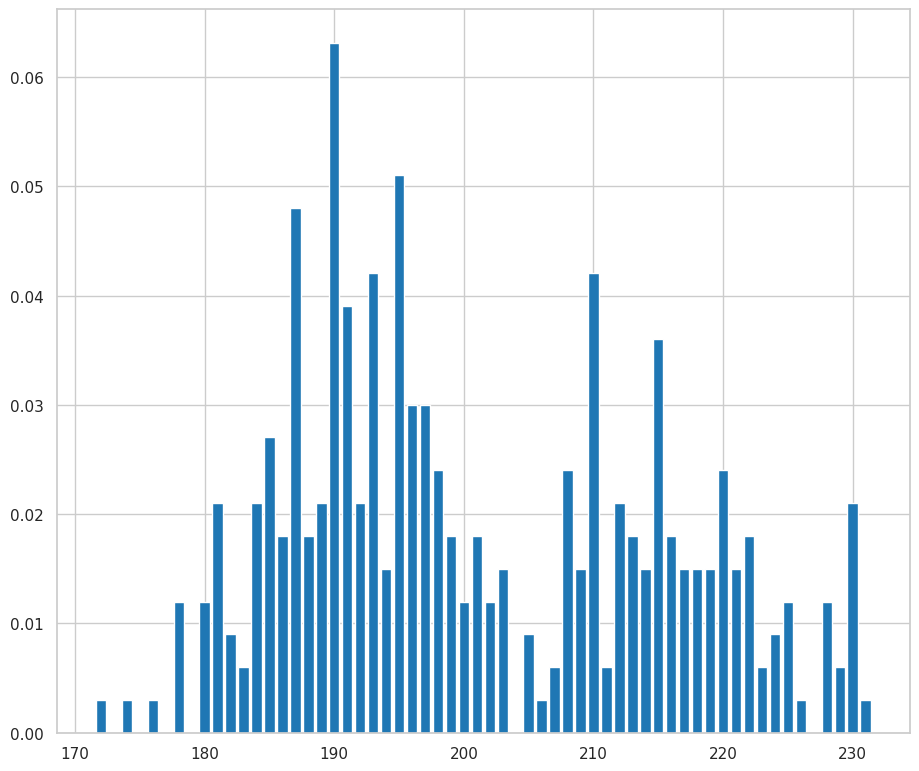

In [59]:
pmf_flipper_length_mm.bar()

In [60]:
#Penguien probability with this flipper legth. 
pmf_flipper_length_mm(190)

0.06306306306306306

In [61]:
#Max flipper legth.
data_penguins_process.flipper_length_mm.max()

231.0

__Cumulative distribution function__

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

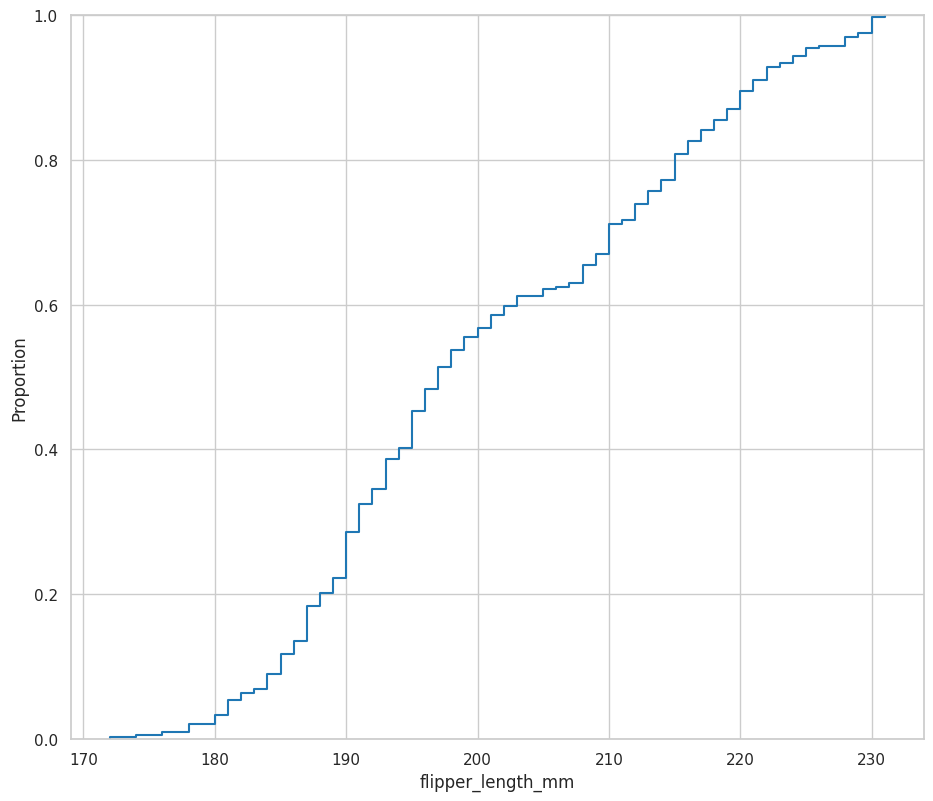

In [62]:
sns.ecdfplot(
    data = data_penguins_process,
    x= 'flipper_length_mm'
)

0.5675675675675675 :200


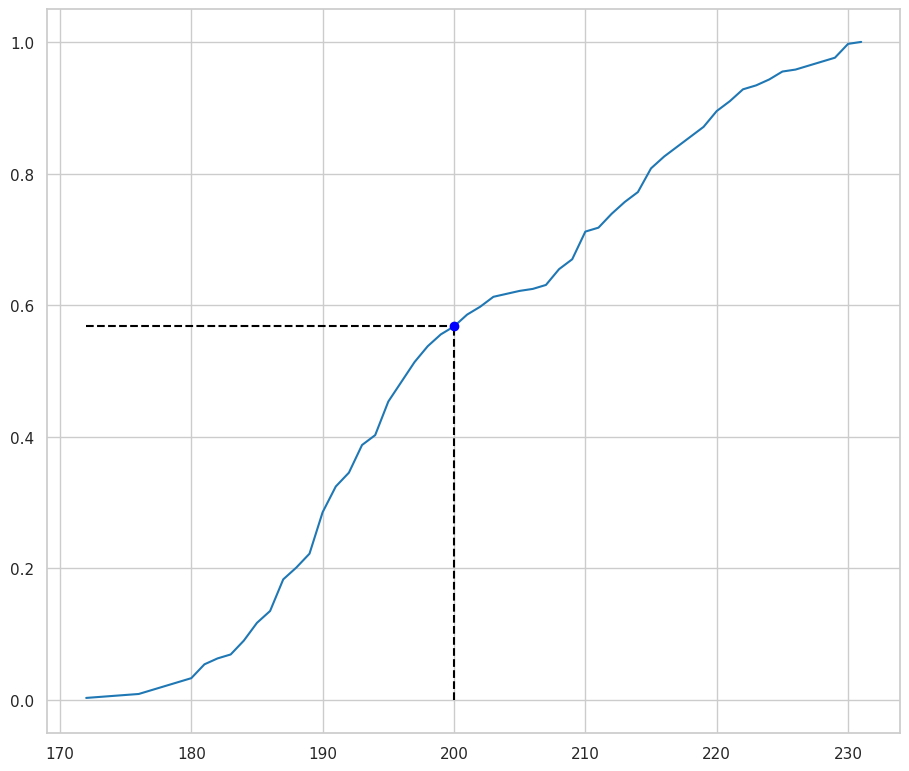

In [63]:
#Empriricaldist.
from py import process


cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    data_penguins_process.flipper_length_mm
)
cdf_flipper_length_mm.plot()
q = 200
p =cdf_flipper_length_mm.forward(q)
print(f'{p} :{q}')
plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)
plt.plot(q,p,'bo')
#Prrobability penguins flipper length 200 mm.

<h1> Funcion de densidad de probabilidad<h1>

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

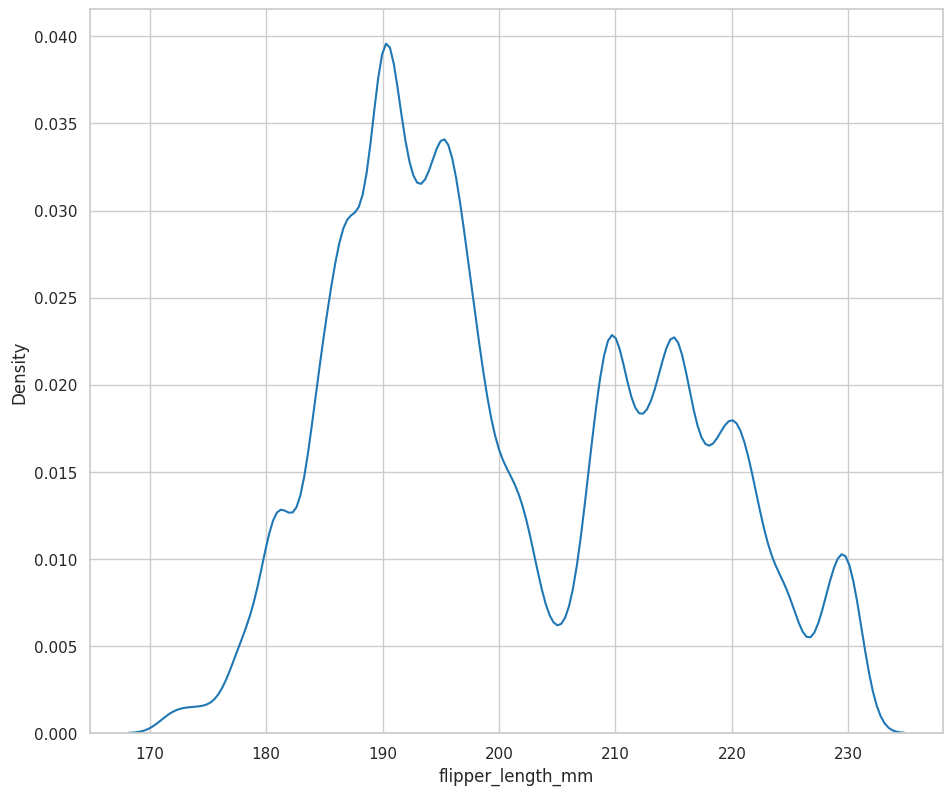

In [64]:
sns.kdeplot(
    data =  data_penguins_process,
    x = 'flipper_length_mm',
    bw_method= 0.09
)

In [65]:
stats = data_penguins_process.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

In [66]:
xs = np.linspace(stats['min'], stats['max'])
xs

array([2700.        , 2773.46938776, 2846.93877551, 2920.40816327,
       2993.87755102, 3067.34693878, 3140.81632653, 3214.28571429,
       3287.75510204, 3361.2244898 , 3434.69387755, 3508.16326531,
       3581.63265306, 3655.10204082, 3728.57142857, 3802.04081633,
       3875.51020408, 3948.97959184, 4022.44897959, 4095.91836735,
       4169.3877551 , 4242.85714286, 4316.32653061, 4389.79591837,
       4463.26530612, 4536.73469388, 4610.20408163, 4683.67346939,
       4757.14285714, 4830.6122449 , 4904.08163265, 4977.55102041,
       5051.02040816, 5124.48979592, 5197.95918367, 5271.42857143,
       5344.89795918, 5418.36734694, 5491.83673469, 5565.30612245,
       5638.7755102 , 5712.24489796, 5785.71428571, 5859.18367347,
       5932.65306122, 6006.12244898, 6079.59183673, 6153.06122449,
       6226.53061224, 6300.        ])

<AxesSubplot: >

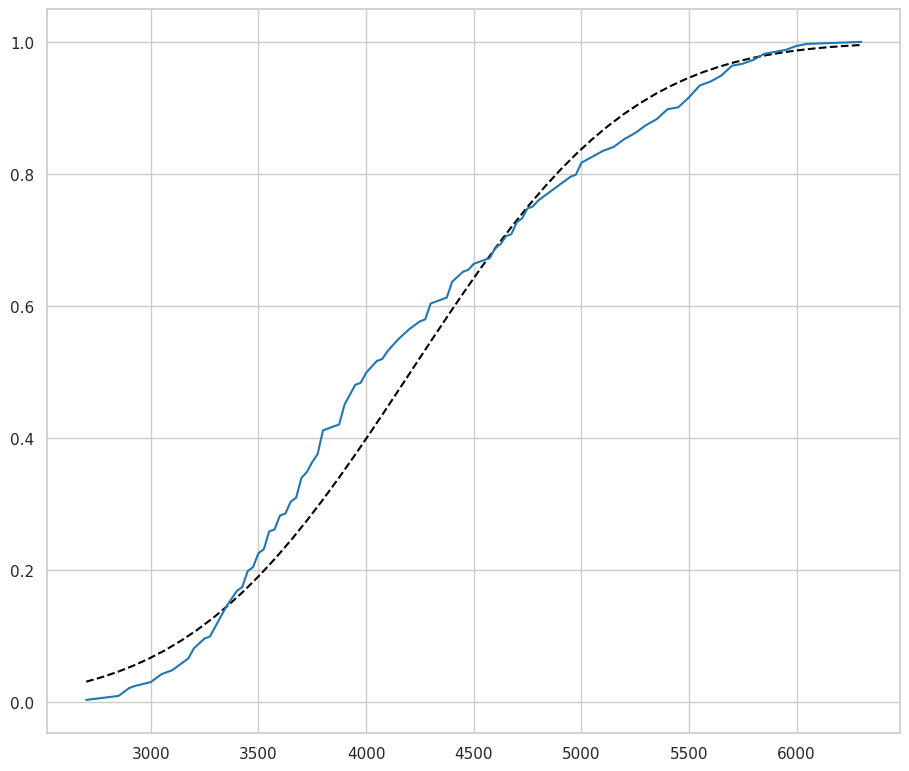

In [67]:
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
plt.plot(xs, ys, color = 'black',linestyle = 'dashed')
grah = empiricaldist.Cdf.from_seq(
    data_penguins_process.body_mass_g,
).plot
grah()

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

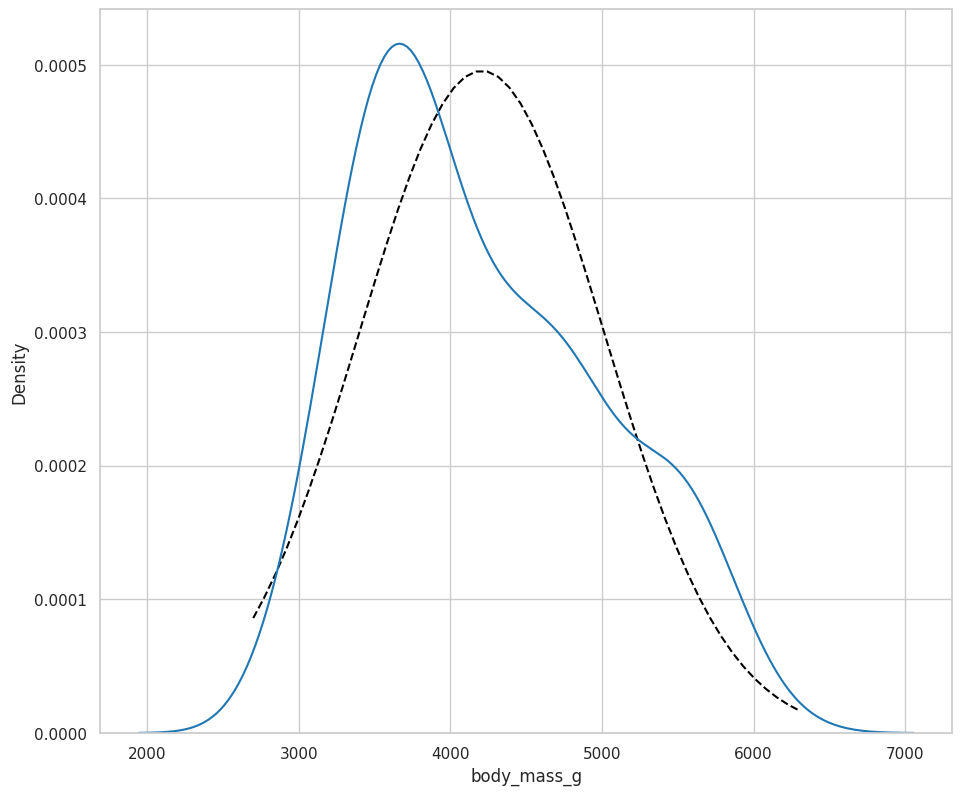

In [68]:
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
plt.plot(xs, ys, color = 'black',linestyle = 'dashed')
sns.kdeplot(
    data = data_penguins_process,
    x ='body_mass_g'
)

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

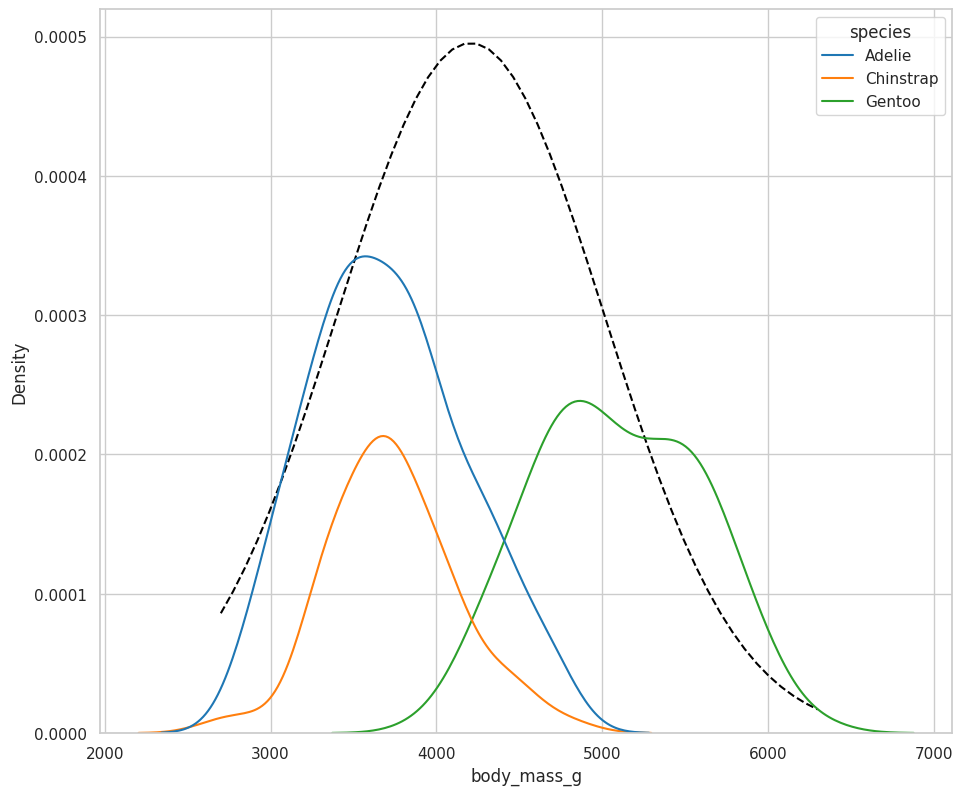

In [69]:
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
plt.plot(xs, ys, color = 'black',linestyle = 'dashed')
sns.kdeplot(
    data = data_penguins_process,
    x ='body_mass_g',
    hue = 'species'
)

In [70]:
data_penguins_process.head(150)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
151,Adelie,Dream,41.5,18.5,201.0,4000.0,Male
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male


<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

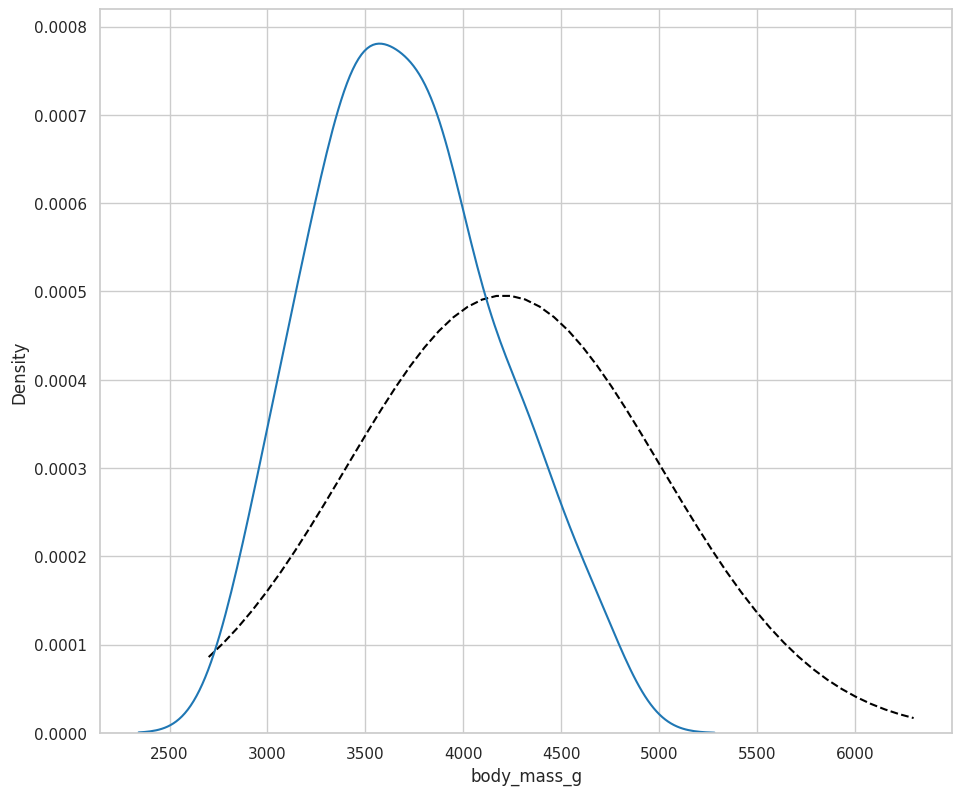

In [71]:
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
plt.plot(xs, ys, color = 'black',linestyle = 'dashed')
Adelie_data = data_penguins_process[data_penguins_process['species'] == 'Adelie']
sns.kdeplot(
    data = Adelie_data,
    x ='body_mass_g'
)

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

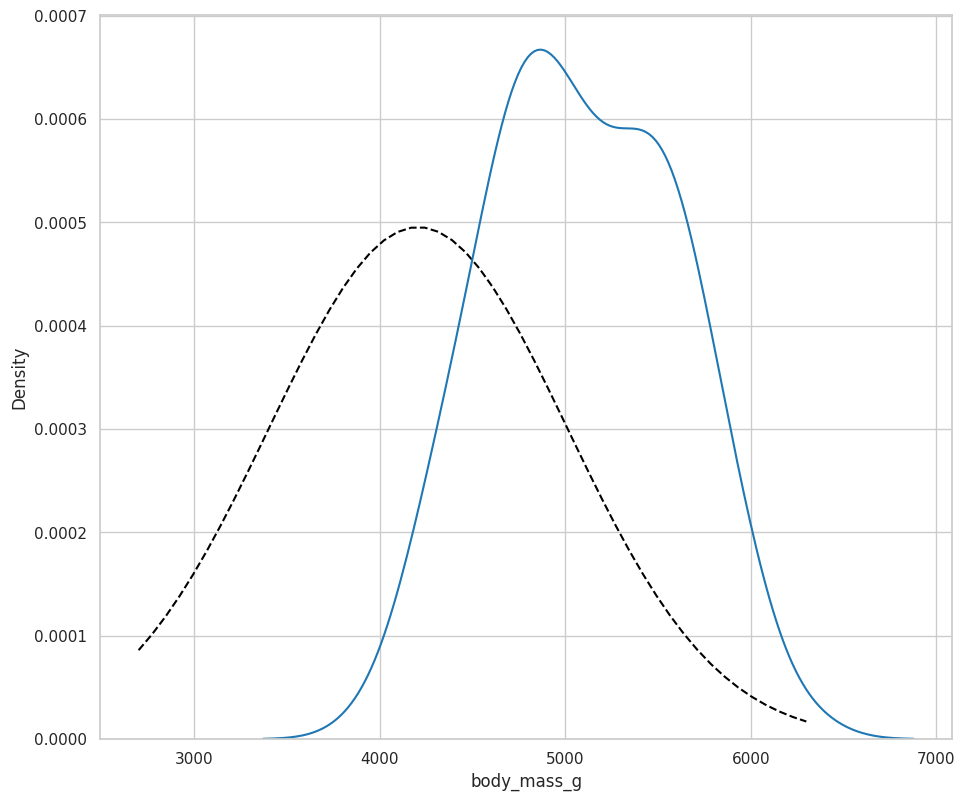

In [72]:
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
plt.plot(xs, ys, color = 'black',linestyle = 'dashed')
Gento_data = data_penguins_process[data_penguins_process['species'] == 'Gentoo']
sns.kdeplot(
    data = Gento_data,
    x ='body_mass_g'
)

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

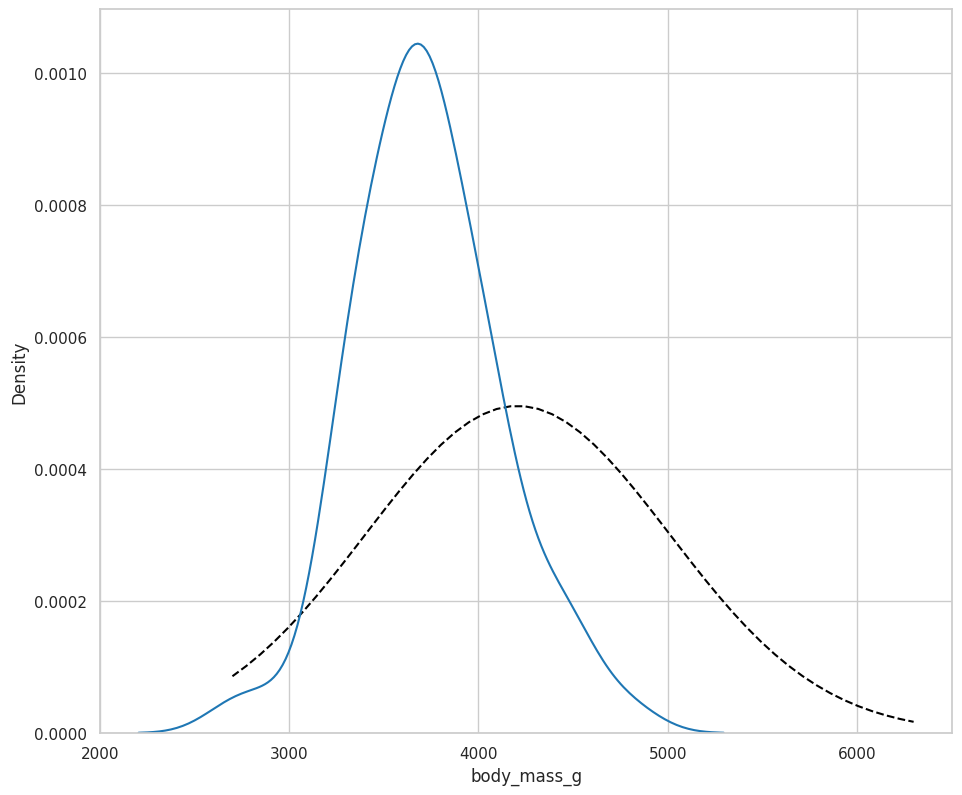

In [73]:
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
plt.plot(xs, ys, color = 'black',linestyle = 'dashed')
chistrap_data = data_penguins_process[data_penguins_process['species'] == 'Chinstrap']
sns.kdeplot(
    data = chistrap_data,
    x ='body_mass_g'
)

__Ley de los grandes numeros__

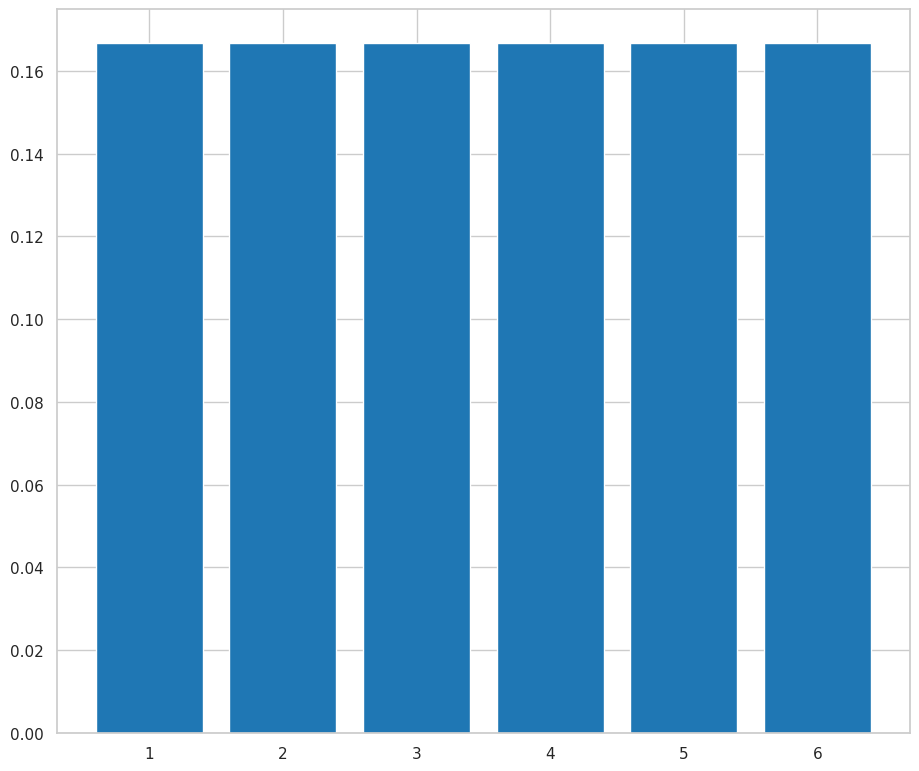

In [74]:
#La probabilidad experimental tiende a la probabilidad teorica a medida que aunmenta el numero de repeticiones del experimento
dice = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()

<h1>Teorema del limite central<h1>
Las medidas de las muestra tiende aproxiadamente a una distribucion normal.

<AxesSubplot: >

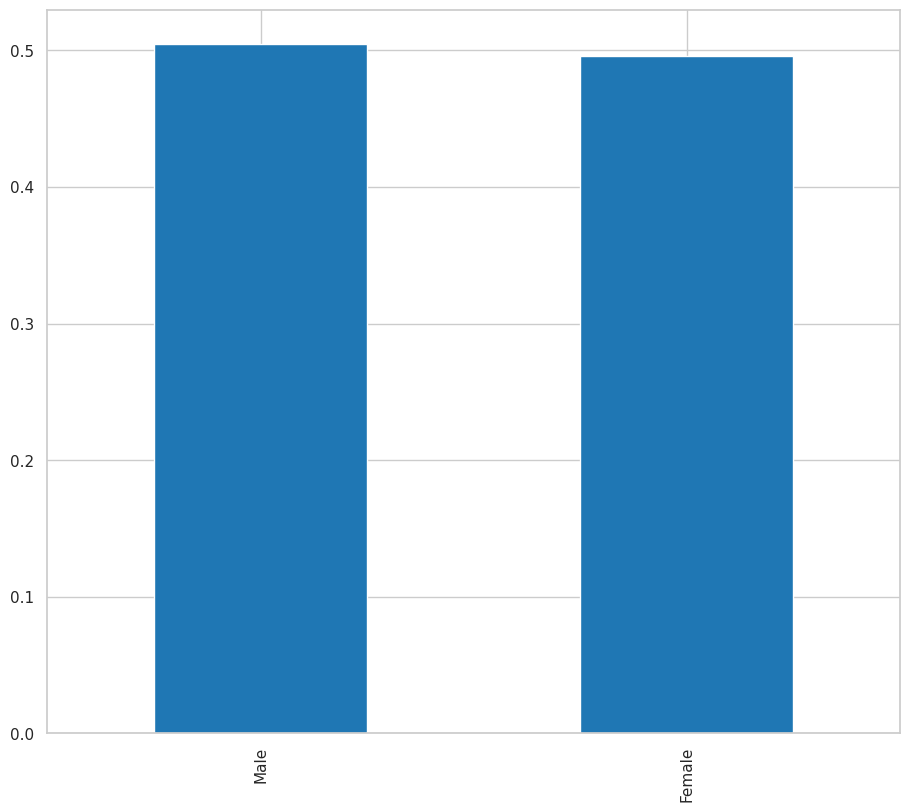

In [75]:
data_penguins_process.sex.value_counts(normalize =True).plot(kind = 'bar')

__Estableciendo relaciones entre 2 variables.__

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

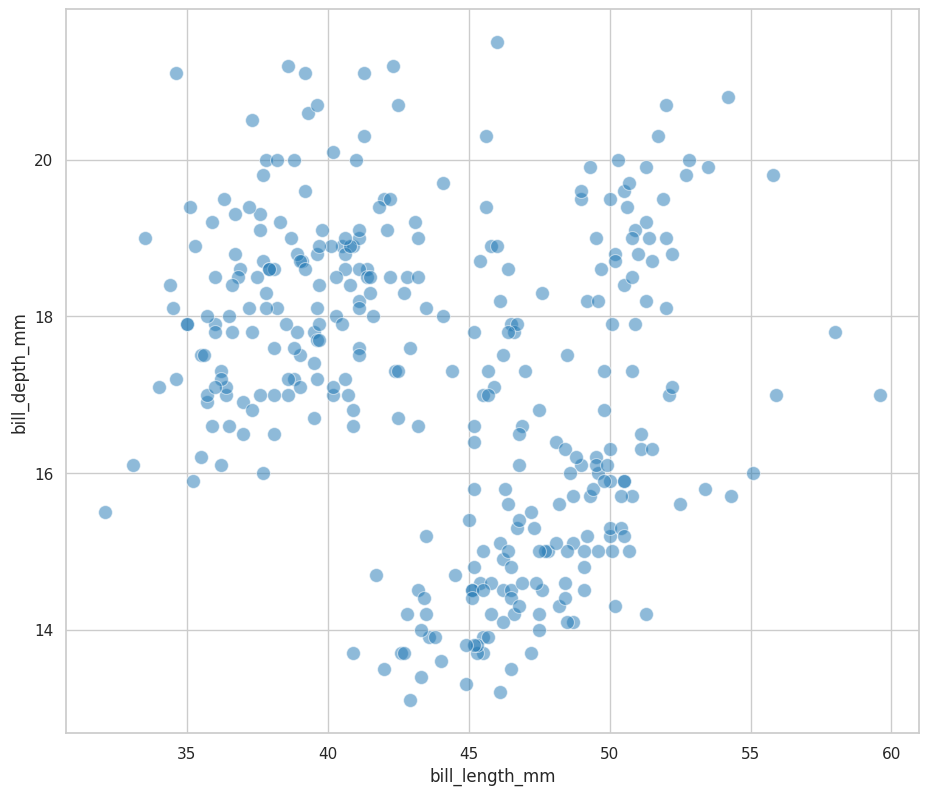

In [76]:
sns.scatterplot(
    data = data_penguins_process,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha = 1/2, # numero de puntos en un solo punto 2 en est caso
    s = 100  #tamaño de los valores.
)

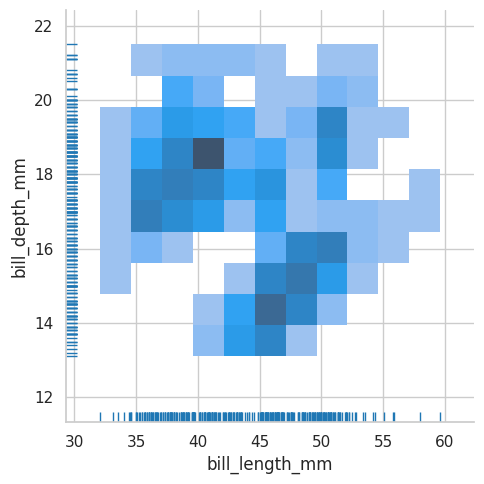

In [77]:
sns.displot(
    data = data_penguins_process,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    rug = True #linea inferior para ver que tan agrupados estan los datos.
)

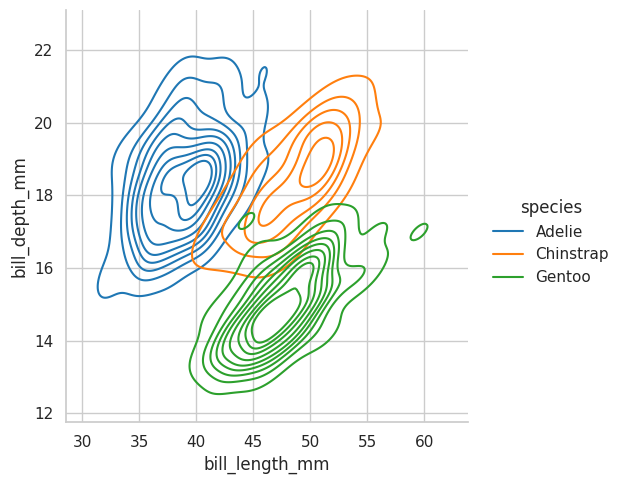

In [78]:
sns.displot(
    data = data_penguins_process,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    hue = 'species',
    kind = 'kde' #Estimando densidades con un kde.
)

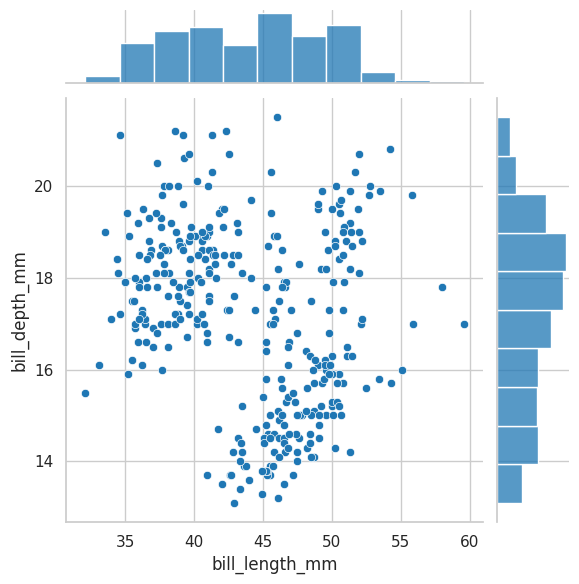

In [79]:
sns.jointplot(
    data = data_penguins_process,
    x ='bill_length_mm',
    y ='bill_depth_mm'
);

__Estableciendo relaciones__

Variables discretas.


<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

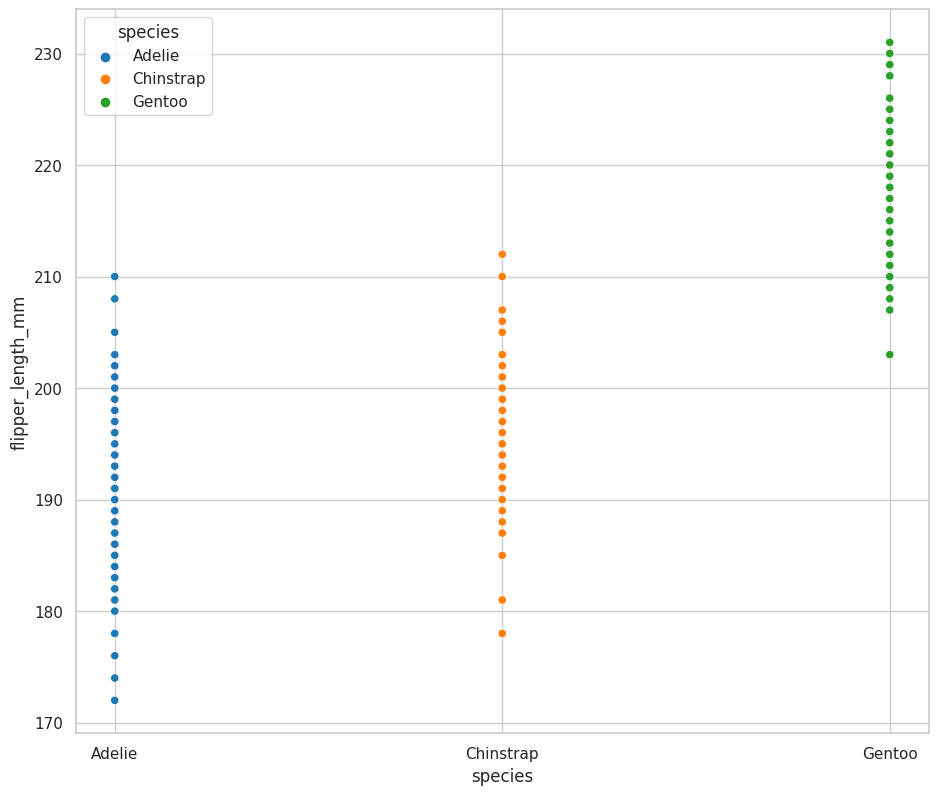

In [80]:
sns.scatterplot(
    data = data_penguins_process,
    x = 'species',
    y = "flipper_length_mm",
    hue = 'species'
    
)

/tmp/ipykernel_508/202375490.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


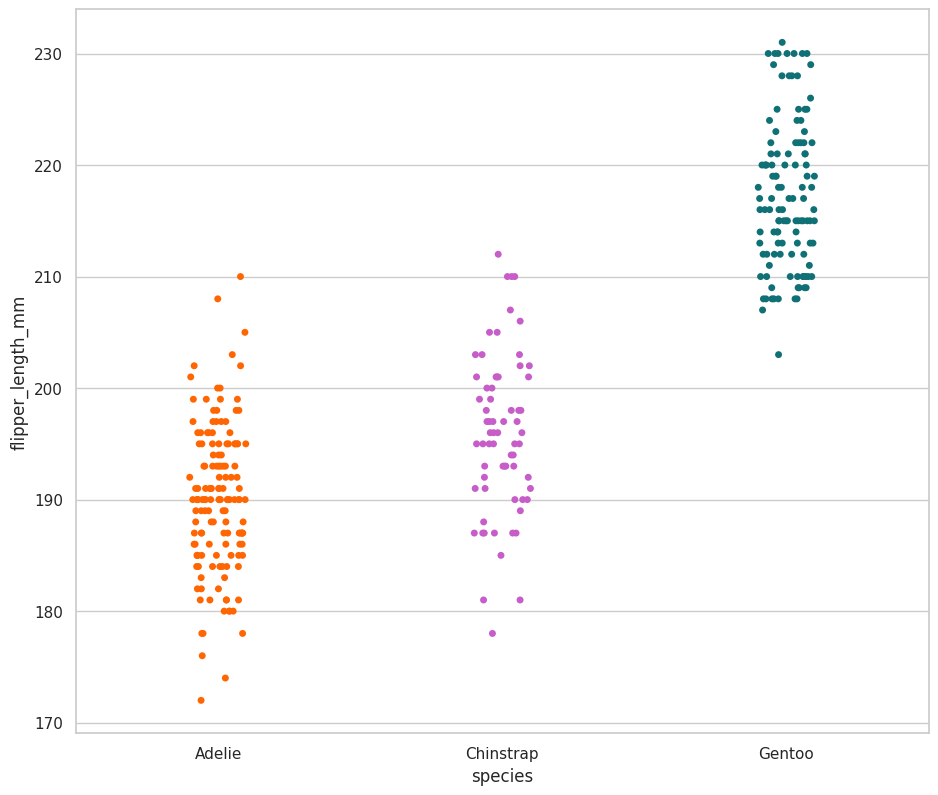

In [81]:
sns.stripplot(
    data = data_penguins_process,
    x = 'species',
    y = 'flipper_length_mm',
    palette= penguin_color
);

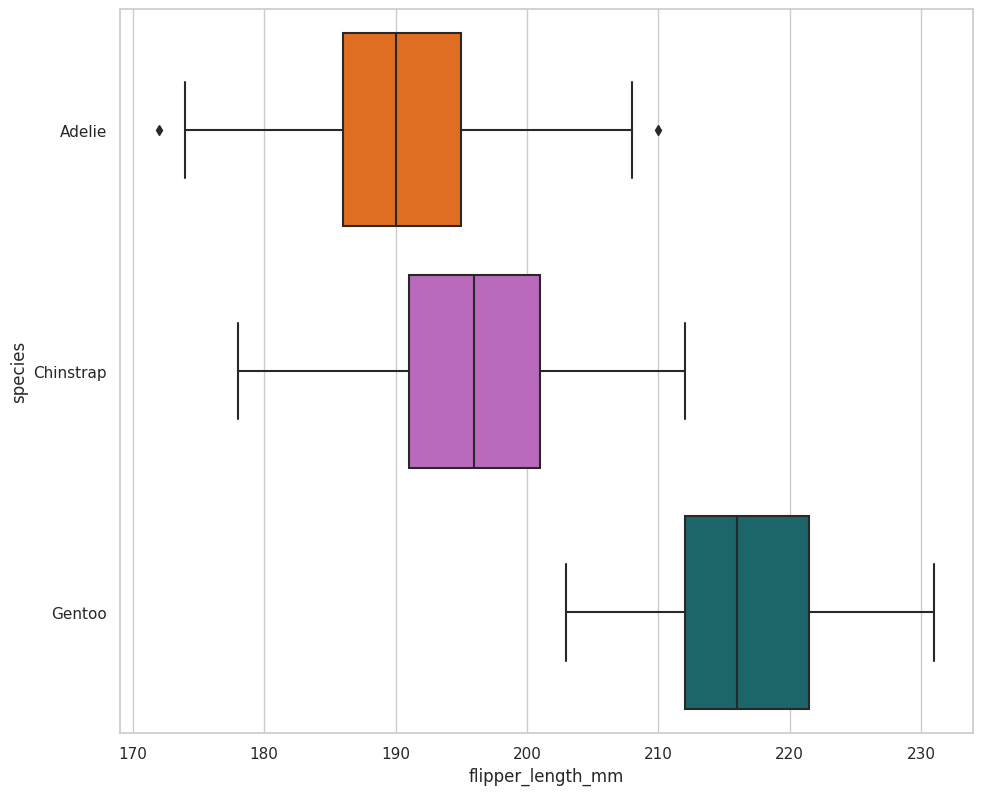

In [84]:
sns.boxplot(
    data = data_penguins_process,
    x  = 'flipper_length_mm',
    y = 'species',
    palette = penguin_color
    );

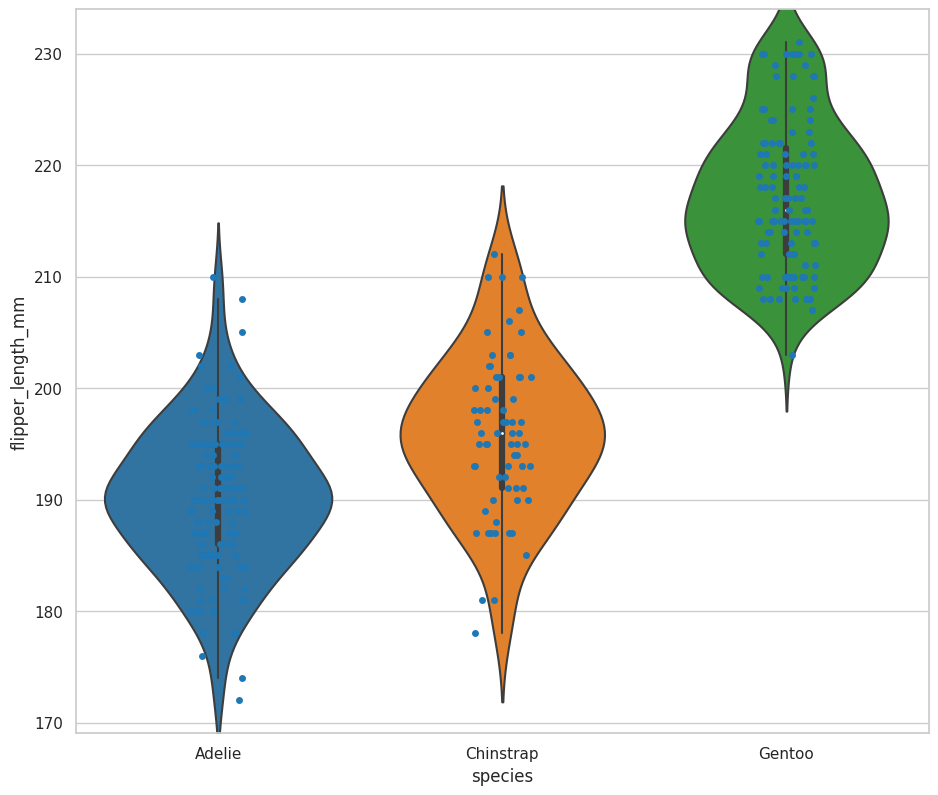

In [88]:
ax = sns.violinplot(
    data = data_penguins_process,
    x ='species',
    y ='flipper_length_mm'
)
ax = sns.stripplot(
    data = data_penguins_process,
    x ='species',
    y = 'flipper_length_mm'
)

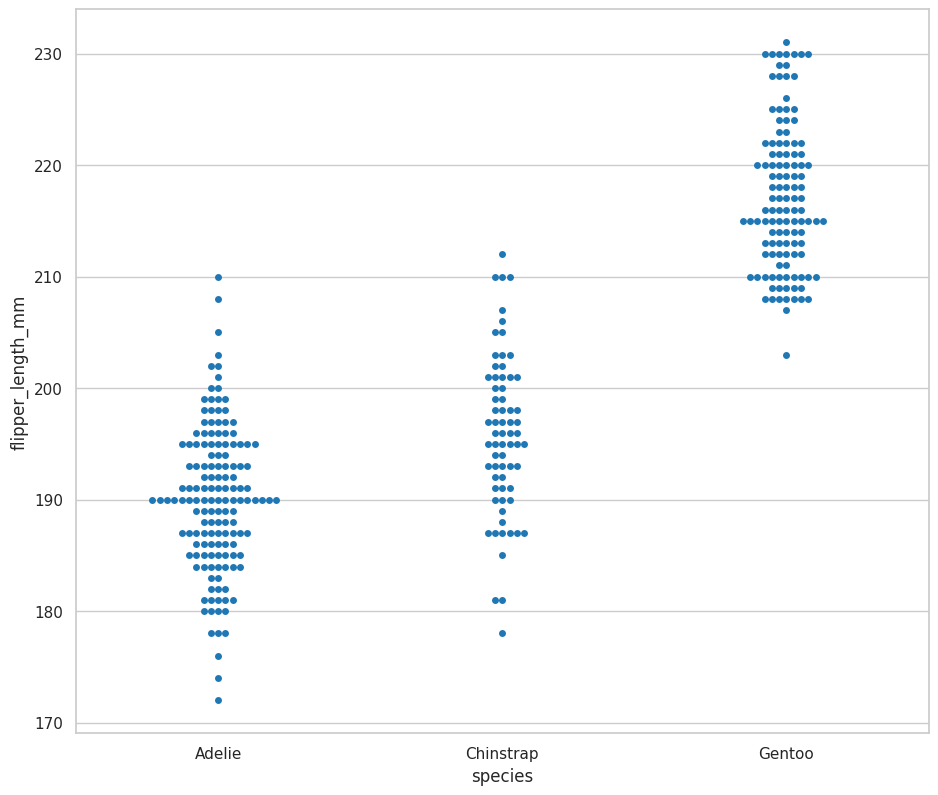

In [90]:
sns.swarmplot(
    data = data_penguins_process,
    x = 'species',
    y = 'flipper_length_mm'
    palette = penguin_color
    );